# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning
**Daniel Son**

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

**1**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/airbnb_NYC.csv', encoding = 'latin1')
df.head()
# we need price to be a float/int, but it is currently an object. 
# need to remove commas, then convert to int
df['Price'] = df['Price'].str.replace(',', '').astype(int)
print(df['Price'].dtype)

int64


In [3]:
df.isna().sum()
# There are no missing prices. 

Host Id                          0
Host Since                       3
Name                             0
Neighbourhood                    0
Property Type                    3
Review Scores Rating (bin)    8323
Room Type                        0
Zipcode                        134
Beds                            85
Number of Records                0
Number Of Reviews                0
Price                            0
Review Scores Rating          8323
dtype: int64

**2**

In [4]:
df = pd.read_csv('data/mn_police_use_of_force.csv', encoding = 'latin1')
df.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [8]:
# See what types of values there are in subject injury
print(df['subject_injury'].unique())
print(len(df))
missing = df['subject_injury'].isna().sum()
print(missing)
# Most subject injury values are missing
print(missing / len(df))

['missing' 'No' 'Yes']
12925
0
0.0


In [9]:
pd.crosstab(df['subject_injury'], df['force_type'], dropna=False)
# When subject injury data is missing, some force types are more common than others.
# Maximal Restraint Technique for example is only present when subject injury is missing.
# A high proportion of bodily force, chemical irritant, and taser use is also present when subject injury is missing.

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury,,,,,,,,,,,
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172
missing,2,7051,1421,0,27,74,87,0,170,31,985


In [10]:
# replace NaN with missing
df['subject_injury'] = df['subject_injury'].fillna('missing')
df['subject_injury'].unique()

array(['missing', 'No', 'Yes'], dtype=object)

**3**

In [11]:
df = pd.read_csv('data/metabric.csv', encoding = 'latin1')
df.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0


In [12]:
# see what the unique values are in overall survival status
print(df['Overall Survival Status'].unique())
# replace the string values with binary values 0/1
df['Overall Survival Status'] = df['Overall Survival Status'].replace('0:LIVING', 0)
df['Overall Survival Status'] = df['Overall Survival Status'].replace('1:DECEASED', 1)
print(df['Overall Survival Status'].unique())


['0:LIVING' '1:DECEASED']
[0 1]


/tmp/ipykernel_69621/1014453713.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Overall Survival Status'] = df['Overall Survival Status'].replace('1:DECEASED', 1)


**4**

In [13]:
df = pd.read_csv('data/airbnb_NYC.csv', encoding = 'latin1')
# See how many missing values there are 
print(df['Review Scores Rating'].isna().sum())
# compute median review score rating
median = df['Review Scores Rating'].median()
# createw new column with imputed values replacing missing values
df['Review Scores Rating Imputed'] = df['Review Scores Rating'].fillna(median)
print(df['Review Scores Rating Imputed'].isna().sum())


8323
0


It's possible that people that feel very strongly about a movie, for better or for worse, are more likely to leave a rating. This could cause some sort of bias in the review scores that are currently in the data, and do not provide a good basis for the median.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

**1**

In [14]:
# using read_excel instead of read_csv
df = pd.read_excel('data/GSAF5.xls')
df.head()
print(df.columns)

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')


**2**

In [15]:
print(df.isna().mean())

Date              0.000000
Year              0.000283
Type              0.002545
Country           0.007068
State             0.068844
Location          0.080153
Activity          0.082414
Name              0.030817
Sex               0.081708
Age               0.423240
Injury            0.004948
Fatal Y/N         0.079304
Time              0.498586
Species           0.442607
Source            0.002827
pdf               0.038875
href formula      0.039582
href              0.039299
Case Number       0.039016
Case Number.1     0.039157
original order    0.038875
Unnamed: 21       0.999859
Unnamed: 22       0.999717
dtype: float64


In [16]:
print(df['Unnamed: 21'].unique())
print(df['Unnamed: 22'].unique())

[nan 'stopped here']
[nan 'Teramo' 'change filename']


In [17]:
df = df.drop(columns=['Unnamed: 21', 'Unnamed: 22'])
print(df.columns)

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order'],
      dtype='object')


**3**

Each row represents a singular shark attack. Columns represent different attributes of the attack, such as date, location, type of attack, and outcome. The dataset contains information about shark attacks that have occurred globally over a certain period of time.

**4**

<class 'pandas.core.series.Series'>
RangeIndex: 7074 entries, 0 to 7073
Series name: Year
Non-Null Count  Dtype  
--------------  -----  
7072 non-null   float64
dtypes: float64(1)
memory usage: 55.4 KB
0.0
2026.0


<Axes: xlabel='Year'>

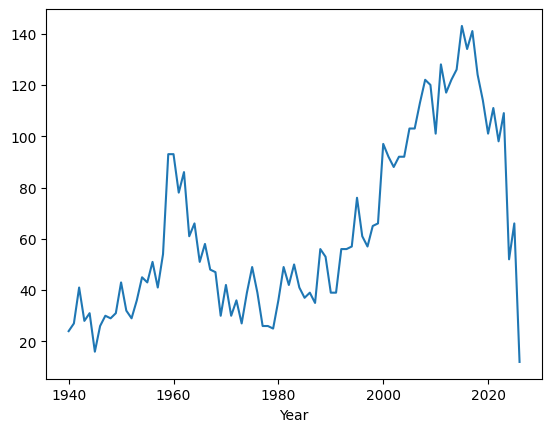

In [18]:
df['Year'].info()
print(df['Year'].min())
print(df['Year'].max())

# filter for 1940 and later
df_recent = df[df['Year'] >= 1940]

# plot trends
df_recent['Year'].value_counts().sort_index().plot()

It seems like the number of attacks has generally risen, and there was a small peak around the 1960s. From the 1980s onward, there is a steady increase, peaking at around the mid-2010s. However, there is a shart dip at the very end, indicating that there may be gaps in more recent data, or advances in technology to prevent shark attacks (?).

**5**

In [23]:
df['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7074 entries, 0 to 7073
Series name: Age
Non-Null Count  Dtype 
--------------  ----- 
4080 non-null   object
dtypes: object(1)
memory usage: 55.4+ KB


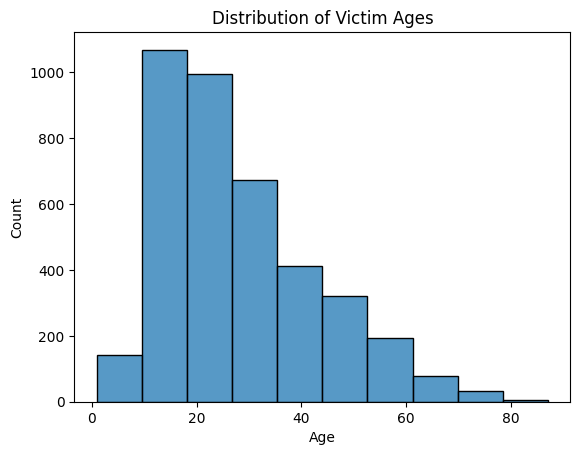

In [24]:
df['Age_Clean'] = pd.to_numeric(df['Age'], errors='coerce')
sns.histplot(df['Age_Clean'].dropna(), bins = 10)
plt.title('Distribution of Victim Ages')
plt.xlabel('Age')
plt.show()

It appears that most victims are between thee age of 10-30. 

**6**

In [25]:
df['Type'].unique()

array(['Unprovoked', 'Provoked', 'Questionable', 'unprovoked',
       ' Provoked', 'Watercraft', 'Sea Disaster', nan, '?', 'Unconfirmed',
       'Unverified', 'Invalid', 'Under investigation', 'Boat'],
      dtype=object)

In [26]:
# cleaning function
def clean_type(x):
    if pd.isna(x):
        return 'Unknown'
    x = str(x).lower().strip()
    if x == 'provoked':
        return 'Provoked'
    elif x == 'unprovoked':
        return 'Unprovoked'
    else:
        return 'Unknown'

df['Type_Clean'] = df['Type'].apply(clean_type)
print(df['Type_Clean'].unique())
print(df['Type_Clean'].value_counts())
print(df['Type_Clean'].value_counts(normalize=True))

['Unprovoked' 'Provoked' 'Unknown']
Type_Clean
Unprovoked    5226
Unknown       1204
Provoked       644
Name: count, dtype: int64
Type_Clean
Unprovoked    0.738762
Unknown       0.170201
Provoked      0.091038
Name: proportion, dtype: float64


**7**

In [37]:
print(df['Fatal Y/N'].value_counts())
print(df['Fatal Y/N'].isna().sum())
# cleaning function for Fatal Y/N
def clean_fatal(x):
    if pd.isna(x):
        return 'Unknown'
    x = str(x).lower().strip()
    if x == 'unknown' or x == 'nan':
        return 'Unknown'
    elif 'y' in x or x == 'f':
        return 'Y'
    elif 'n' in x:
        return 'N'
    else:
        return 'Unknown'
df['Fatal_Clean'] = df['Fatal Y/N'].apply(clean_fatal)
print(df['Fatal_Clean'].value_counts())

Fatal Y/N
N          4933
Y          1488
UNKNOWN      71
 N            7
F             5
M             3
n             1
Nq            1
2017          1
Y x 2         1
N             1
y             1
Name: count, dtype: int64
561
Fatal_Clean
N          4943
Y          1495
Unknown     636
Name: count, dtype: int64


**8**

In [38]:
ct = pd.crosstab(df['Type_Clean'], df['Fatal_Clean'])
display(ct * 100)

Fatal_Clean,N,Unknown,Y
Type_Clean,,,
Provoked,61400,900,2100
Unknown,44900,55200,20300
Unprovoked,388000,7500,127100


Based off the data, unprovoked attacks at much more likely to be fatal compared to provoked attacks. 

The maximum price significantly dropped, as we windsorized it to cap out at the upper bound. The standard deviation is much less, meaning that the data is less spread out (this makes sense, as we have removed outliers), however, the overall mean only slightly dropped. 

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

**Question 1:**
This paper is basically about how to “tidy” data in a way that’s simpler and more efficient, using tools that make it easier to reshape datasets from messy inputs into clean outputs that are actually usable for analysis.

**Question 2:**
The tidy data standard is meant to make early exploration and analysis smoother, and it also helps different data tools work together more cleanly (since they’re all expecting data in a similar, consistent structure).

**Question 3:**
I think it’s saying that it’s pretty easy to start collecting data and labeling variables at first, but the hard part is organizing it into a structure that’s most meaningful for the person analyzing it. Like, you might need to rearrange rows/columns to make observations clearer, or convert data types so you can actually compute things and explore patterns.

**Question 4:**
Wickham treats values as the actual data points in the dataset (quantitative or qualitative). Variables are the categories/attributes being measured (like height, temperature, or duration) and they contain values across different units. An observation is all the values measured for one specific unit (like one person, one city, or one day) across those variables.

**Question 5:**
Tidy data is basically a standard way to align the meaning of the dataset with its layout. A dataset is tidy or messy depending on whether rows, columns, and tables line up cleanly with observations, variables, and data types.

**Question 6:**
The five most common messy dataset problems are:

* Column headers contain values instead of variable names

* Multiple variables are stored in a single column

* Variables are stored in both rows and columns

* Multiple types of observational units are stored in the same table

* A single observational unit is stored across multiple tables

Table 4 is messy because income is split across multiple columns (so each income range becomes its own “feature”), instead of income being one variable with different values. That makes comparisons and analysis harder, since you’re treating what should be one variable as many separate columns. That’s why you’d “melt” it: melting turns those column categories into rows, so the income ranges become values under one variable.

**Question 7:**
Table 11 is messy because the days of the month are stored as separate columns, even though they’re really just values of a single variable (day). That format makes it harder to treat each record consistently as an observation and makes patterns/correlations harder to spot.

Table 12 is molten and tidy because those day columns have been collapsed into rows, so now there’s one “day” variable and one value column. That reduces empty cells, makes the table easier to scan, and makes the dataset way easier to analyze.

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? 

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
6. Which giftors provide the most money, in total? 

**1**

In [39]:
df = pd.read_csv('data/ForeignGifts_edu.csv', encoding = 'latin1')
df.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


**2**

(array([2.7996e+04, 1.1300e+02, 4.9000e+01, 2.3000e+01, 1.1000e+01,
        3.0000e+00, 4.0000e+00, 1.5000e+01, 0.0000e+00, 7.0000e+00]),
 array([ -537770.        ,  9516006.9       , 19569783.8       ,
        29623560.7       , 39677337.6       , 49731114.5       ,
        59784891.40000001, 69838668.3       , 79892445.2       ,
        89946222.10000001, 99999999.        ]),
 <BarContainer object of 10 artists>)

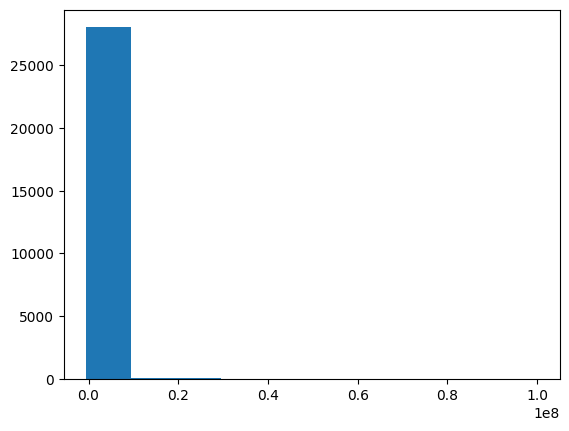

In [40]:
plt.hist(df['Foreign Gift Amount'])

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64


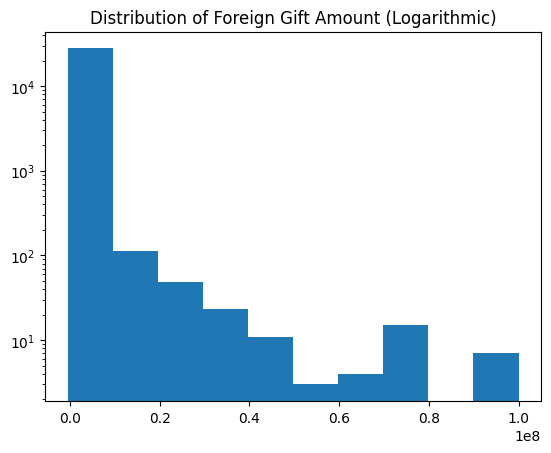

In [41]:
print(df['Foreign Gift Amount'].describe())
# log scale to make it easier to interpret the data even with outliers
plt.hist(df['Foreign Gift Amount'], log=True)
plt.title('Distribution of Foreign Gift Amount (Logarithmic)')
plt.show()

The data is extremely skewed- there are a couple of outliers which are very expensive, causing the bins to be huge numbers, with most of the other gifts which are relatively small values getting squished into the first single bin.

**4**

In [42]:
# top 15 countries by number of gifts
print(df['Country of Giftor'].value_counts().head(15))

# top 15 countries by amount given
print(df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15))

Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64


**5**

Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


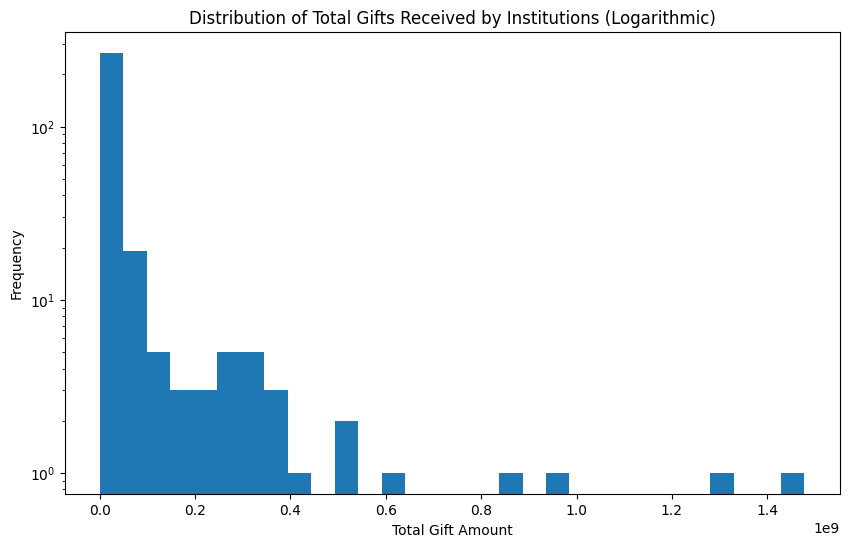

In [43]:
# top 15 institutions
print(df.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15))

# Histogram of total amount received by all institutions
total_by_inst = df.groupby('Institution Name')['Foreign Gift Amount'].sum()
plt.figure(figsize=(10,6))
plt.hist(total_by_inst, bins=30, log=True)
plt.title('Distribution of Total Gifts Received by Institutions (Logarithmic)')
plt.xlabel('Total Gift Amount')
plt.ylabel('Frequency')
plt.show()

**6**

In [44]:
# top 15 giftors
print(df.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15))

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64


The top three giftors are all a part of the Qatar Foundation, and if we treat all three as one giftor their monetary contribution is far more than any other donator. Other major contributors include the Saudi Arabian Cultural Mission, HCL, and Anonymous.

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

**1**

In [45]:
df_cc = pd.read_csv('data/college_completion.csv', encoding='latin1')
df_cc.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


**2**

In [46]:
print({df_cc.shape[0]})
print({df_cc.shape[1]})

{3798}
{63}


There are 3,798 observations, and 63 different variables. 

**3**

In [47]:
# crosstab 
pd.crosstab(df_cc['control'], df_cc['level'])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


Private-for-profit colleges are pretty evenly split between 2-year and 4-year programs. Private not-for-profit colleges are almost all 4-year programs. Public programs lean more towards 2-year programs, although the split is around 60/40. 

**4**

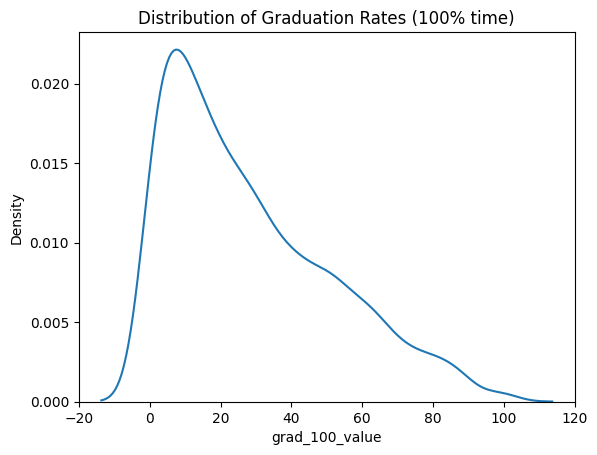

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


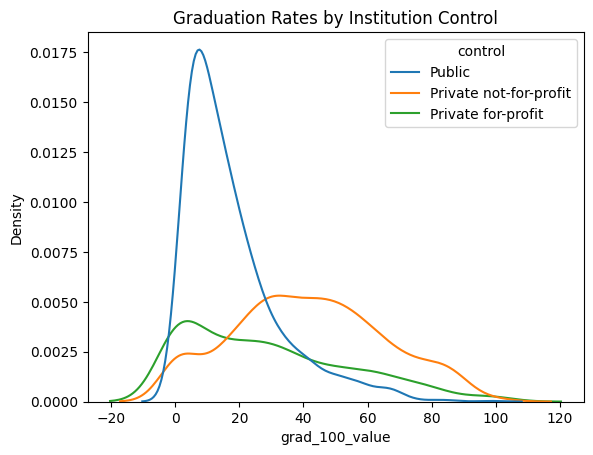

,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.0,29.108858,25.601687,0.0,6.95,24.7,46.75,100.0
Private not-for-profit,1189.0,41.660976,23.551231,0.0,25.00,41.0,58.30,100.0
Public,1499.0,17.430887,14.729443,0.0,6.90,13.2,23.25,97.8


In [48]:
# kde plot for grad_100_value, and describe
sns.kdeplot(df_cc['grad_100_value'].dropna())
plt.title('Distribution of Graduation Rates (100% time)')
plt.show()
print(df_cc['grad_100_value'].describe())

# conditioned on control
sns.kdeplot(data=df_cc, x='grad_100_value', hue='control')
plt.title('Graduation Rates by Institution Control')
plt.show()

display(df_cc.groupby('control')['grad_100_value'].describe())


Private Not-For-Profit schools have the most favorable graduation rates, public schools have the lowest rates (mean ~17%, median ~13.2%), and Private For-Profit schools fall in the middle (mean ~29%, median ~24.7%).

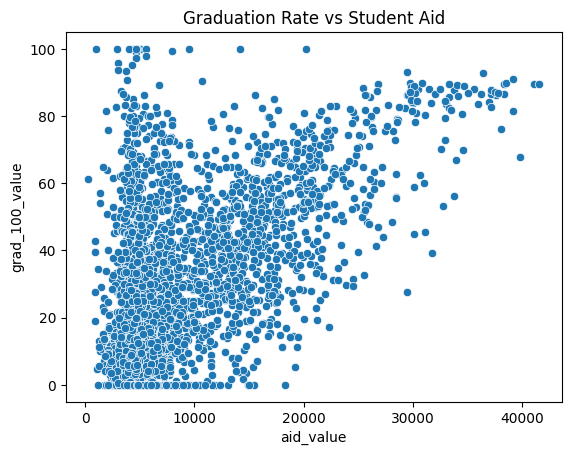

covariance:
                grad_100_value     aid_value
grad_100_value      543.483382  8.861048e+04
aid_value         88610.483169  4.121201e+07
correlation
                grad_100_value  aid_value
grad_100_value        1.000000   0.575879
aid_value             0.575879   1.000000


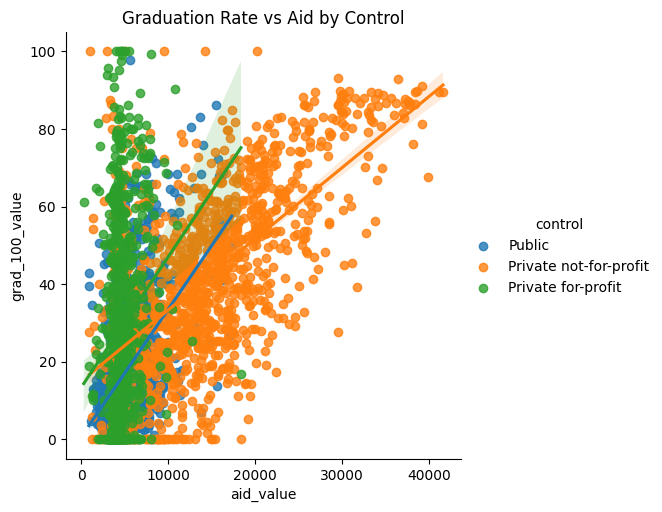


Stats for Private for-profit:
                grad_100_value  aid_value
grad_100_value        1.000000   0.188363
aid_value             0.188363   1.000000

Stats for Private not-for-profit:
                grad_100_value  aid_value
grad_100_value        1.000000   0.601591
aid_value             0.601591   1.000000

Stats for Public:
                grad_100_value  aid_value
grad_100_value        1.000000   0.482481
aid_value             0.482481   1.000000


In [49]:
# 5. scatterplot grad_100_value by aid_value
sns.scatterplot(data=df_cc, x='aid_value', y='grad_100_value')
plt.title('Graduation Rate vs Student Aid')
plt.show()

# covariance and correlation
print("covariance:")
print(df_cc[['grad_100_value', 'aid_value']].cov())
print("correlation")
print(df_cc[['grad_100_value', 'aid_value']].corr())

# conditioned on control
sns.lmplot(data=df_cc, x='aid_value', y='grad_100_value', hue='control')
plt.title('Graduation Rate vs Aid by Control')
plt.show()

for control_type, group in df_cc.groupby('control'):
    print(f"\nStats for {control_type}:")
    print(group[['grad_100_value', 'aid_value']].corr())

Overall, there seems to be a moderate positive correlation between student aid and graduation rates- as aid increases, graduation rates also tend to increase. 
Conditioning on control, we find that private-not-for-profit has the strongest positive relationship (approx. 0.60), followed by public with a moderate positive relationship (approx 0.48). Private-for-profit institutions hae a very weak relationship, at approx. 0.18, indicating that aid amount is not a strong predictor of graduation rates. 

Private-for-profit colleges are pretty evenly split between 2-year and 4-year programs. Private not-for-profit colleges are almost all 4-year programs. Public programs lean more towards 2-year programs, although the split is around 60/40. 

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$. 

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

Look inside of question 6 folder for work

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

**1**

In [50]:
df_ames = pd.read_csv('data/ames_prices.csv', encoding = 'latin1')
df_ames.head()

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [51]:
df_cc = pd.read_csv('data/college_completion.csv', encoding = 'latin1')
df_cc.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


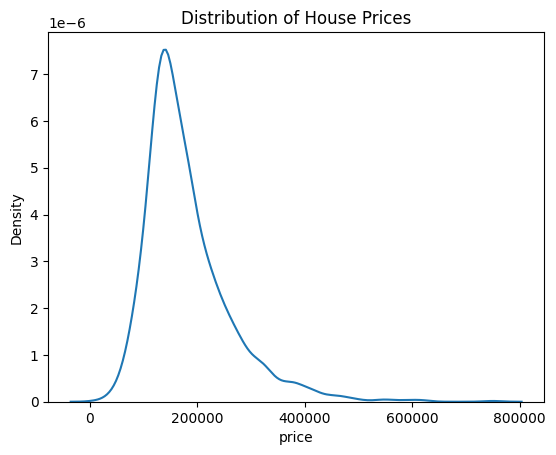

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64


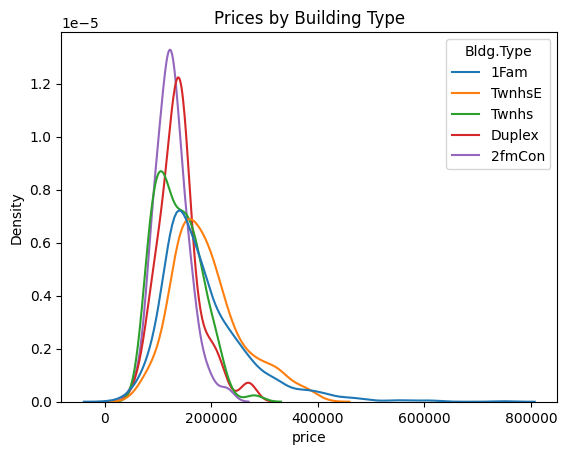

,count,mean,std,min,25%,50%,75%,max
Bldg.Type,,,,,,,,
1Fam,2425.0,184812.041237,82821.802329,12789.0,130000.0,165000.0,220000.0,755000.0
2fmCon,62.0,125581.709677,31089.239840,55000.0,106562.5,122250.0,140000.0,228950.0
Duplex,109.0,139808.935780,39498.973534,61500.0,118858.0,136905.0,153337.0,269500.0
Twnhs,101.0,135934.059406,41938.931130,73000.0,100500.0,130000.0,170000.0,280750.0
TwnhsE,233.0,192311.914163,66191.738021,71000.0,145000.0,180000.0,222000.0,392500.0


In [52]:
# kde plot of house prices
sns.kdeplot(df_ames['price'])
plt.title('Distribution of House Prices')
plt.show()
print(df_ames['price'].describe())

# kde plot of house prices by building type
sns.kdeplot(data=df_ames, x='price', hue='Bldg.Type', common_norm=False)
plt.title('Prices by Building Type')
plt.show()

# print stats for each building type separately
summary_by_type = df_ames.groupby('Bldg.Type')['price'].describe()
display(summary_by_type)

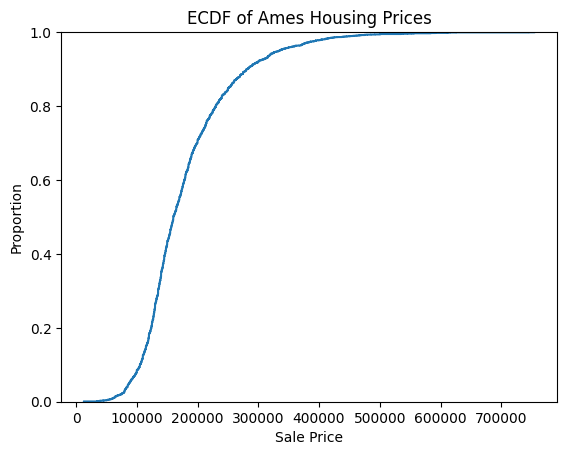

0.00     12789.0
0.25    129500.0
0.50    160000.0
0.75    213500.0
1.00    755000.0
Name: price, dtype: float64


In [53]:
sns.ecdfplot(data=df_ames, x='price')
plt.title('ECDF of Ames Housing Prices')
plt.xlabel('Sale Price')
plt.ylabel('Proportion')
plt.show()

print(df_ames['price'].quantile([0, 0.25, 0.5, 0.75, 1]))

On average, the end unit town house (TwnhsE) is the most expensive. However, the single family (1Fam) building type has by far the most variance. 

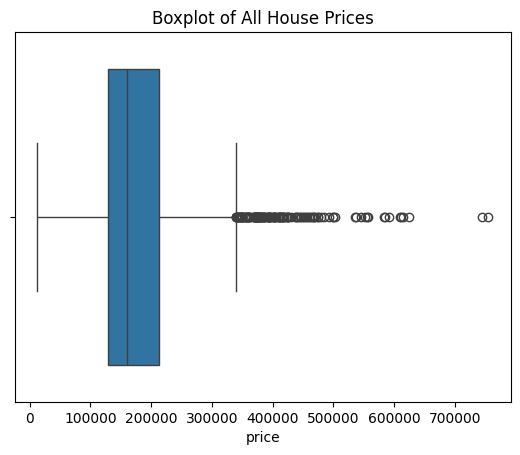

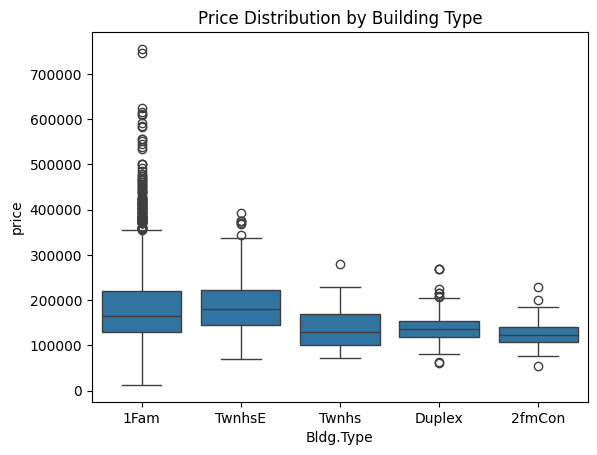

In [54]:
sns.boxplot(x=df_ames['price'])
plt.title('Boxplot of All House Prices')
plt.show()

sns.boxplot(data=df_ames, x='Bldg.Type', y='price')
plt.title('Price Distribution by Building Type')
plt.show()

Compared to the other building times, 1Fam has the most extreme high-price outliers, even though the median, Q1, and Q3 are not far off from the other building types. These outliers significantly affect the mean calculation.

In [55]:
Q1 = df_ames['price'].quantile(0.25)
Q3 = df_ames['price'].quantile(0.75)
print(Q1, Q3)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

df_ames['outlier'] = (df_ames['price'] < lower_bound) | (df_ames['price'] > upper_bound)
print(df_ames['outlier'].sum())

129500.0 213500.0
137


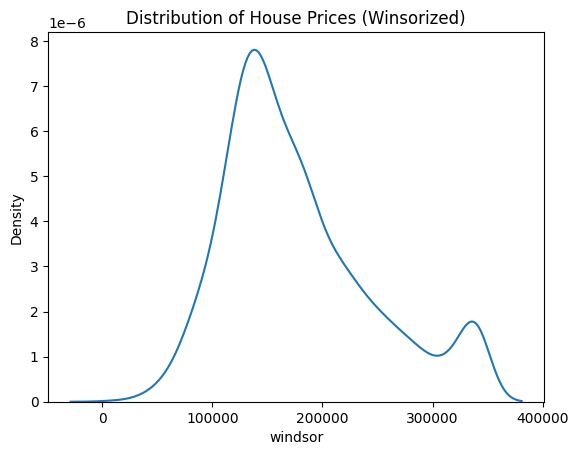

count      2930.000000
mean     177082.283959
std       67906.837135
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      339500.000000
Name: windsor, dtype: float64


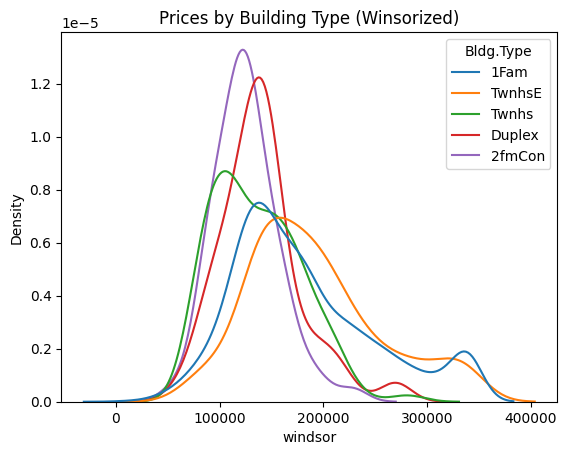

,count,mean,std,min,25%,50%,75%,max
Bldg.Type,,,,,,,,
1Fam,2425.0,180417.359588,69177.514863,12789.0,130000.0,165000.0,220000.0,339500.0
2fmCon,62.0,125581.709677,31089.239840,55000.0,106562.5,122250.0,140000.0,228950.0
Duplex,109.0,139808.935780,39498.973534,61500.0,118858.0,136905.0,153337.0,269500.0
Twnhs,101.0,135934.059406,41938.931130,73000.0,100500.0,130000.0,170000.0,280750.0
TwnhsE,233.0,191349.420601,63715.987930,71000.0,145000.0,180000.0,222000.0,339500.0


In [56]:
# create a copy of the price column
df_ames['windsor'] = df_ames['price']

# 2. Replace outliers with the boundary values
df_ames.loc[df_ames['price'] > upper_bound, 'windsor'] = upper_bound
df_ames.loc[df_ames['price'] < lower_bound, 'windsor'] = lower_bound

sns.kdeplot(df_ames['windsor'])
plt.title('Distribution of House Prices (Winsorized)')
plt.show()
print(df_ames['windsor'].describe())

sns.kdeplot(data=df_ames, x='windsor', hue='Bldg.Type', common_norm=False)
plt.title('Prices by Building Type (Winsorized)')
plt.show()

summary_by_type = df_ames.groupby('Bldg.Type')['windsor'].describe()
display(summary_by_type)

The maximum price significantly dropped, as we windsorized it to cap out at the upper bound. The standard deviation is much less, meaning that the data is less spread out (this makes sense, as we have removed outliers), however, the overall mean only slightly dropped. 